<a href="https://colab.research.google.com/github/jkfip/Fake_News_Detector/blob/master/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fake News Classifier**

In [23]:
#nltk download 
import nltk
nltk.download
nltk.download('stopwords')
nltk.download('punkt')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer




In [25]:
#From google.colab import files
#Uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Read the dataset
train=pd.read_csv('/content/drive/My Drive/train.csv')
train


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [27]:
#Columns names in dataset
for i in train:
  print(i)

id
title
author
text
label


In [28]:
#Rows and column data values
for ind,row in train.iterrows():
  print(ind,row)

Streaming output truncated to the last 5000 lines.
Name: 19966, dtype: object
19967 id                                                    19967
title     INSPIRATIONAL VIDEO : 94 Year Old Supporter Wa...
author                                                  NaN
text      INSPIRATIONAL VIDEO : 94 Year Old Supporter Wa...
label                                                     1
Name: 19967, dtype: object
19968 id                                                    19968
title                                   In Case You Missed…
author                                   Consortiumnews.com
text      “ Justifying the Saudi Slaughter in Yemen ” by...
label                                                     1
Name: 19968, dtype: object
19969 id                                                    19969
title     Fashion Notes: Melania Trump Stuns In Dolce &a...
author                                          John Binder
text      First Lady Melania Trump turned to her favorit...
label     

In [29]:

train['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [30]:
train=train.fillna('')
train['total']=train['title']+train['author']+train['text']
train

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [31]:
train

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredConsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [32]:
#Drop id,title,author,text
train=train.drop(['title','author','id','text'],axis=1)

In [33]:
df=train.copy()
df

,label,total
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You FiredConsortiumnew...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
...,...,...
20795,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,0,Macy’s Is Said to Receive Takeover Approach by...
20798,1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [34]:
#check the nan values
df.isnull().sum()

label    0
total    0
dtype: int64

In [35]:
#Replace all non-english words to space
#Removing the stopwords
#Steamming of non-stopwords
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df)):
  review=re.sub('[^a-zA-Z]', ' ',df['total'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [36]:
#Applying Tdidfvectorizer
tfidf_v= TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [37]:
x=df['total']

In [38]:
Y=df['label']

In [39]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**PassiveAggressiveClassifier Algoritham With Hyperparameter Tuning**

In [40]:
pac=PassiveAggressiveClassifier()
parameters=[
            {'C': [100, 10, 1.0, 0.1, 0.01]
}
]
model1= RandomizedSearchCV(pac,parameters,scoring='accuracy',cv=5)
model1.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=PassiveAggressiveClassifier(C=1.0, average=False,
                                                         class_weight=None,
                                                         early_stopping=False,
                                                         fit_intercept=True,
                                                         loss='hinge',
                                                         max_iter=1000,
                                                         n_iter_no_change=5,
                                                         n_jobs=None,
                                                         random_state=None,
                                                         shuffle=True,
                                                         tol=0.001,
                                                         validation_fraction=0.1,
                                                         ver

In [41]:
y_pred_pac=model1.predict(x_test)

In [42]:
model1.best_params_

{'C': 0.01}

In [43]:
model1.best_score_

0.9503434065934065

**Confusion_matrix,Precision,Recall,F1Score,Classification_report of 
PassiveAggressiveClassifier** 

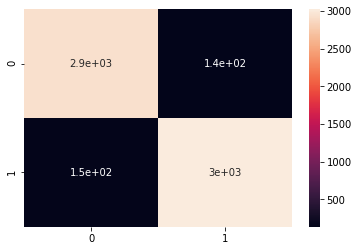

In [45]:
cm_pac=confusion_matrix(y_pred_pac,y_test)
sns.heatmap(cm_pac,annot=True)



In [46]:
pspac=precision_score(y_pred_pac,y_test)
pspac

0.9572243346007605

In [47]:
rspac=recall_score(y_pred_pac,y_test)
rspac

0.9532975702114231

In [48]:
f1pac=f1_score(y_pred_pac,y_test)
f1pac

0.9552569169960475

In [49]:
cr_pac=classification_report(y_pred_pac,y_test)
cr_pac

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95      3071\n           1       0.96      0.95      0.96      3169\n\n    accuracy                           0.95      6240\n   macro avg       0.95      0.95      0.95      6240\nweighted avg       0.95      0.95      0.95      6240\n'

**MultinomialNB Algoritham With Hyperparameter Tuning**

In [50]:
mnb=MultinomialNB()
parameters=[
            {'alpha': [100, 10, 1.0, 0.1, 0.01]
}
]
model2= RandomizedSearchCV(mnb,parameters,scoring='accuracy',cv=5)
model2.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'alpha': [100, 10, 1.0, 0.1, 0.01]}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [51]:
y_pred_mnb=model2.predict(x_test)

In [52]:
model2.best_params_

{'alpha': 0.01}

In [53]:
model2.best_score_

0.8956043956043956

**Confusion_matrix,Precision,Recall,F1Score,Classification_report of
MultinomialNB** 

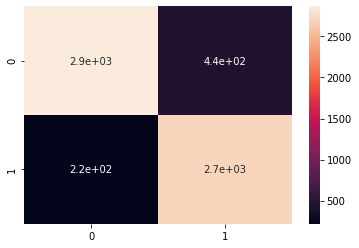

In [54]:
cm_mnb=confusion_matrix(y_pred_mnb,y_test)
sns.heatmap(cm_mnb,annot=True)



In [55]:
psmnb=precision_score(y_pred_mnb,y_test)
psmnb

0.8608998732572877

In [56]:
rsmnb=recall_score(y_pred_mnb,y_test)
rsmnb

0.9260395364689843

In [57]:
f1mnb=f1_score(y_pred_mnb,y_test)
f1mnb

0.8922824302134648

In [58]:
cr_mnb=classification_report(y_pred_mnb,y_test)
cr_mnb

'              precision    recall  f1-score   support\n\n           0       0.93      0.87      0.90      3306\n           1       0.86      0.93      0.89      2934\n\n    accuracy                           0.89      6240\n   macro avg       0.90      0.90      0.89      6240\nweighted avg       0.90      0.89      0.89      6240\n'

**LogisticRegression Algoritham With Hyperparameter Tuning**


In [59]:
lr=LogisticRegression()
parameters=[
            {'penalty': ['l1','l2','elasticnet','none'],
             'C': [100, 10, 1.0, 0.1, 0.01],
'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
]
model3= RandomizedSearchCV(lr,parameters,scoring='accuracy',cv=5)
model3.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_va

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions=[{'C': [100, 10, 1.0, 0.1, 0.01],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['newton-cg', 'l

In [60]:
model3.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [61]:
model3.best_score_

0.9507554945054946

**Confusion_matrix,Precision,Recall,F1Score,Classification_report of
LogisticRegression**

In [62]:
y_pred_lr=model3.predict(x_test)

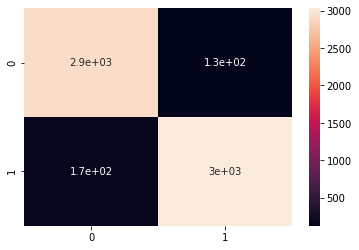

In [63]:
cm_lr=confusion_matrix(y_pred_lr,y_test)
sns.heatmap(cm_lr,annot=True)



In [64]:
pslr=precision_score(y_pred_lr,y_test)
pslr

0.9600760456273765

In [65]:

rslr=recall_score(y_pred_lr,y_test)
rslr

0.9477635283077885

In [66]:
f1lr=f1_score(y_pred_lr,y_test)
f1lr

0.953880056666142

In [67]:
cr_lr=classification_report(y_pred_lr,y_test)
cr_lr

'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95      3043\n           1       0.96      0.95      0.95      3197\n\n    accuracy                           0.95      6240\n   macro avg       0.95      0.95      0.95      6240\nweighted avg       0.95      0.95      0.95      6240\n'

**DecisionTreeClassifier Algoritham With Hyperparameter Tuning**


In [68]:
dtc=DecisionTreeClassifier()
parameters=[
            {'max_depth':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'max_features':['auto','sqrt','log2'],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'min_samples_split':[1,2,5,6,9,10]}
]
model4=RandomizedSearchCV(dtc,parameters,scoring='accuracy',cv=5)
model4.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [69]:
model4.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 23,
 'min_samples_split': 9}

In [70]:

model4.best_score_

0.7440934065934066

In [71]:
y_pred_dtc=model4.predict(x_test)

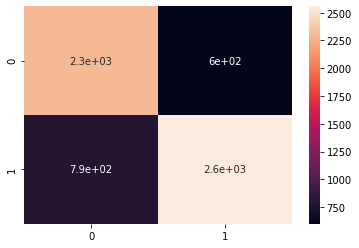

In [72]:
cm_dtc=confusion_matrix(y_pred_dtc,y_test)
sns.heatmap(cm_dtc,annot=True)



****Confusion_matrix,Precision,Recall,F1Score,Classification_report of
DecisionTreeClassifier****

In [73]:
psdtc=precision_score(y_pred_dtc,y_test)
psdtc

0.8102027883396705

In [74]:
rsdtc=recall_score(y_pred_dtc,y_test)
rsdtc

0.7648818426562968

In [75]:
f1dtc=f1_score(y_pred_dtc,y_test)
f1dtc

0.7868902908139714

In [76]:
cr_dtc=classification_report(y_pred_dtc,y_test)
cr_dtc

'              precision    recall  f1-score   support\n\n           0       0.75      0.79      0.77      2897\n           1       0.81      0.76      0.79      3343\n\n    accuracy                           0.78      6240\n   macro avg       0.78      0.78      0.78      6240\nweighted avg       0.78      0.78      0.78      6240\n'

**RandomForestClassifier Algoritham With Hyperparameter Tuning**

In [79]:
rfc=RandomForestClassifier()
parameters=[
            {'max_depth':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'max_features':['auto','sqrt','log2'],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,20,23,50,100],'min_samples_split':[1,2,5,6,9,10]}
]
model5=RandomizedSearchCV(rfc,parameters,scoring='accuracy',cv=5)
model5.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [80]:
model5.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'min_samples_split': 10}

In [81]:
model5.best_score_

0.9129120879120878

In [82]:
y_pred_rfc=model5.predict(x_test)

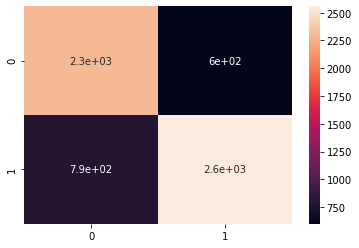

In [83]:
cm_rfc=confusion_matrix(y_pred_rfc,y_test)
sns.heatmap(cm_dtc,annot=True)



**Confusion_matrix,Precision,Recall,F1Score,Classification_report of
RandomForestClassifier**

In [84]:
psrfc=precision_score(y_pred_rfc,y_test)
psrfc

0.95595690747782

In [85]:
rsrfc=recall_score(y_pred_rfc,y_test)
rsrfc

0.8834553440702781

In [86]:
f1rfc=f1_score(y_pred_rfc,y_test)
f1rfc

0.9182772789529752

In [88]:
cr_rfc=classification_report(y_pred_rfc,y_test)
cr_rfc

'              precision    recall  f1-score   support\n\n           0       0.87      0.95      0.91      2825\n           1       0.96      0.88      0.92      3415\n\n    accuracy                           0.91      6240\n   macro avg       0.91      0.92      0.91      6240\nweighted avg       0.92      0.91      0.91      6240\n'